# Venta de sillas en Coppel mediante simulación

Aquí, los días lunes, martes, ..., domingo se van a representar por medio de números; de hecho, se va a proponer que los lunes son todos múltiplos del número 7.

| L | M | W | J | V | S | D | L | M | W | J  | V  | S  | D  | L  |
|---|---|---|---|---|---|---|---|---|---|--- |--- |--- |--- |--- |
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 |




In [17]:
from random import random
import numpy as np
import pandas as pd
import openpyxl

# Variable aleatoria Bernoulli de parametro p.
def bernoulli(p):
	u = random()
	if u<=p:
		return 1
	else:
		return 0

# Variable aleatoria Binomial de parametros n y p.
def bin(n,p):
	if n==1:
		return bernoulli(p)
	else:
		return np.array([bernoulli(p) for i in range(n)]).sum()

# Variable aleatoria de la decision
def decision():
	u = random()
	if u<=0.6:
		return 1 # mandar a domicilio
	elif u>0.6 and u<=0.9:
		return 2 # compro las sillas en existencia
	elif u>0.9 and u<1:
		return 3 # compro sillas en existencia + sillas en CEDIS(Bodega)

def inventario(q,dias):
  q0 = q
  inv = []
  ventas = []
  encabezado = ['Inventario','Ventas']
  for i in range(dias):
    u1 = bin(6,3/6) # sillas que puede comprar para que se lleve a su domicilio
    u2 = bin(2,1/7) # compra de sillas que solo estan en la tienda
    u3 = bin(4,1/4) # compro las sillas que estaban en tienda mas otras sillas
    compra = decision() # el cliente decidio...
    if i%7==0 or (i-3)%7==0: # Los lunes y Jueves se resurte la tienda
      q = q0
      if compra==1:
        inv.append(q)
        ventas.append(u1)

      elif compra==2:
        if q-u2<0:
          ventas.append(q)
          q = 0
          inv.append(q)
        else:
          q-=u2
          inv.append(q)
          ventas.append(u2)

      elif compra==3:
        ventas.append(q+u3)
        q = 0
        inv.append(q)

    else: # si no es lunes o jueves entonces se esperan ventas
      if q>0:
        if compra==1:
          inv.append(q)
          ventas.append(u1)

        elif compra==2:
          if q-u2<0:
            ventas.append(q)
            q = 0
            inv.append(q)
          else:
            q-=u2
            inv.append(q)
            ventas.append(u2)

        elif compra==3:
          ventas.append(q+u3)
          q = 0
          inv.append(q)
      else:
        inv.append(q)
        ventas.append(0)

  return pd.DataFrame(np.array([inv,ventas]).T,columns = encabezado)

**Simulación de ventas de sillas en una tienda Coppel durante 7 días junto con su gráfica.**

            0  1  2  3  4  5  6
Inventario  2  2  2  0  0  0  0
Ventas      0  3  4  2  0  0  0 




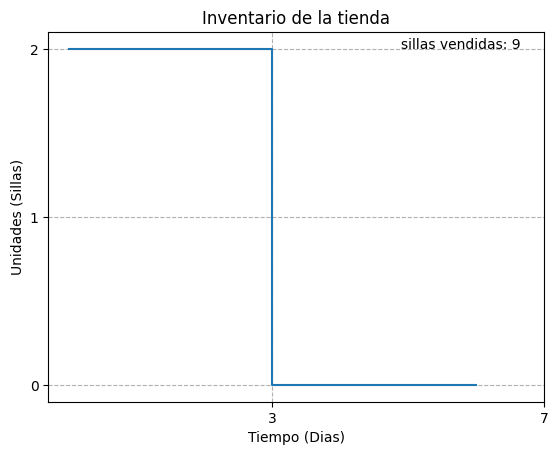

In [18]:
import matplotlib.pyplot as plt

# Primero se hace la simulacion, se imprime la tabla y luego se realiza la grafica
dias = 7 # numero de dias a simular
v = inventario(2,dias)
print(v.T,"\n\n")


# Grafica
fig , ax = plt.subplots()

plt.step(np.arange(0,dias,1),v['Inventario'],where='post')
ax.set_yticks(range(v['Inventario'].min(),v['Inventario'].max()+1))
plt.title('Inventario de la tienda')
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Unidades (Sillas)')
plt.text( dias*0.7 , 2 , 'sillas vendidas: {}'.format(v['Ventas'].sum()))
ax.grid(linestyle = 'dashed')

def indice(i):
  if i%7==0 or (i-3)%7==0:
    return i
ax.set_xticks(list(filter(indice,range(dias+2))))
# plt.savefig("grafico1.png")
plt.show()

**Simulación de ventas de sillas en una tienda Coppel durante 14 días junto con su gráfica.**

            0   1   2   3   4   5   6   7   8   9   10  11  12  13
Inventario   0   0   0   2   2   2   2   2   2   2   2   2   2   2
Ventas       3   0   0   2   2   3   4   0   4   4   0   0   0   0 




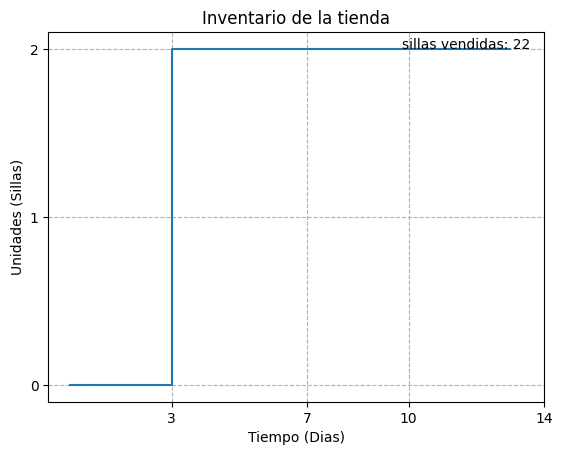

In [19]:
import matplotlib.pyplot as plt

# Primero se hace la simulacion, se imprime la tabla y luego se realiza la grafica
dias = 14 # numero de dias a simular
v = inventario(2,dias)
print(v.T,"\n\n")


# Grafica
fig , ax = plt.subplots()

plt.step(np.arange(0,dias,1),v['Inventario'],where='post')
ax.set_yticks(range(v['Inventario'].min(),v['Inventario'].max()+1))
plt.title('Inventario de la tienda')
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Unidades (Sillas)')
plt.text( dias*0.7 , 2 , 'sillas vendidas: {}'.format(v['Ventas'].sum()))
ax.grid(linestyle = 'dashed')

def indice(i):
  if i%7==0 or (i-3)%7==0:
    return i
ax.set_xticks(list(filter(indice,range(dias+2))))
# plt.savefig("grafico1.png")
plt.show()
#v

**Simulación de ventas de sillas en una tienda Coppel durante $T$ días junto con su gráfica.**

            0   1   2   3   4   5   6   7   8   9   ...  50  51  52  53  54  \
Inventario   2   0   0   2   0   0   0   2   2   2  ...   2   1   2   2   2   
Ventas       3   4   0   2   2   0   0   0   0   6  ...   0   1   1   4   0   

            55  56  57  58  59  
Inventario   2   2   2   1   2  
Ventas       2   3   2   1   6  

[2 rows x 60 columns] 




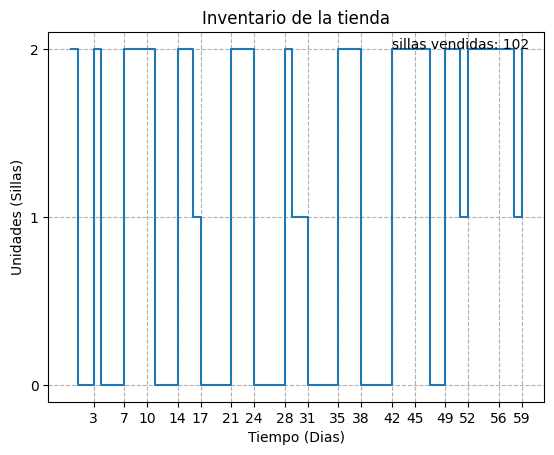

In [20]:
import matplotlib.pyplot as plt

# Primero se hace la simulacion, se imprime la tabla y luego se realiza la grafica
# En este caso T = d3
d3 = 60 # dias a simular
v = inventario(2,d3)
print(v.T,"\n\n")

# Grafica
fig , ax = plt.subplots()

plt.step(np.arange(0,d3,1),v['Inventario'],where='post')
ax.set_yticks(range(v['Inventario'].min(),v['Inventario'].max()+1))
plt.title('Inventario de la tienda')
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Unidades (Sillas)')
plt.text( d3*0.7 , 2 , 'sillas vendidas: {}'.format(v['Ventas'].sum()))
ax.grid(linestyle = 'dashed')

def indice(i):
  if i%7==0 or (i-3)%7==0:
    return i
ax.set_xticks(list(filter(indice,range(d3+2))))
# plt.savefig("grafico1.png")
plt.show()

Se hace la comparación de los graficos de las simulaciónes del inventario de tienda para 7, 14 y 60 dias.

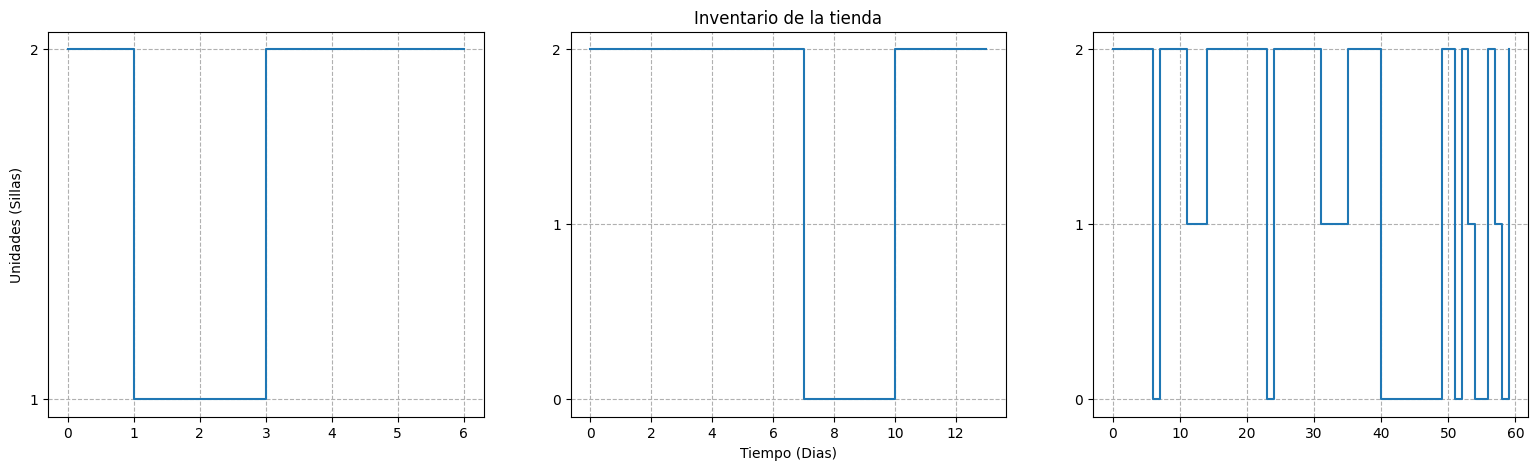

In [21]:
fig = plt.figure(figsize=(19.1, 5.0))

# 7 Dias
plt.subplot(131)
plt.ylabel("Unidades (Sillas)")
ax = plt.subplot(131)
ax.set_yticks([0,1,2])
ax.grid(linestyle = 'dashed')
plt.step( np.arange(0,7,1) , inventario(2,7)['Inventario'] , where='post')

# 14 Dias
plt.subplot(132)
plt.title('Inventario de la tienda')
plt.xlabel('Tiempo (Dias)')
ax = plt.subplot(132)
ax.set_yticks([0,1,2])
ax.grid(linestyle = 'dashed')
plt.step( np.arange(0,14,1) , inventario(2,14)['Inventario'] , where='post')

# 60 Dias
plt.subplot(133)
ax = plt.subplot(133)
ax.set_yticks([0,1,2])
ax.grid(linestyle = 'dashed')
plt.step( np.arange(0,60,1) , inventario(2,60)['Inventario'] , where='post')
plt.show()

**CEDIS Coppel le distribuye a las siguientes tiendas**

In [22]:
tiendas = pd.read_csv("https://raw.githubusercontent.com/AyaxYordi/archivos-csv-o-excel/main/tiendas%20coppel.csv")
tiendas

,Coppel,Stock,Delegacion
0,Santa Martha,2,Iztapalapa
1,Fernando Arruti,2,Iztapalapa
2,Tepalcates,2,Iztapalapa
3,Plaza central,2,Iztapalapa
4,Purisima,2,Iztapalapa
5,Plaza Ermita,2,Iztapalapa
6,Atlalilco,2,Iztapalapa
7,Granjas Esmeralda,2,Iztapalapa
8,Del Moral,2,Iztapalapa
9,Tezontle,2,Iztacalco


In [23]:
def sim(dias,tabla):
  A = np.zeros((len(tabla.index),dias))
  for j in range(len(tabla.index)):
    A[j] = inventario(2,dias)['Ventas']
  return pd.DataFrame(A , index = tabla.iloc[0:,0],dtype=int)

B = sim(7,tiendas)
A = pd.DataFrame(B.sum(),index=np.arange(0,len(B.columns),1),columns=["Total de ventas"]).T

pd.concat([B,A])

,0,1,2,3,4,5,6
Santa Martha,0,2,1,3,0,0,0
Fernando Arruti,4,1,0,4,1,2,0
Tepalcates,1,0,6,2,1,3,2
Plaza central,5,0,4,0,2,2,1
Purisima,2,3,4,3,0,0,0
Plaza Ermita,4,0,0,2,0,1,4
Atlalilco,0,0,4,5,0,3,0
Granjas Esmeralda,5,0,1,4,6,3,0
Del Moral,6,3,1,5,0,3,4
Tezontle,0,2,2,3,2,4,0


**Ventas por dia de todas las tiendas**

In [24]:
pd.DataFrame(B.sum(),columns = ["Total de ventas por dia:"]).T

,0,1,2,3,4,5,6
Total de ventas por dia:,31,17,37,42,18,35,18


**Se calcula el número de sillas vendidas por todas las tiendas en una semana.**

In [25]:
print("Total de sillas vendidas por todas las tiendas en una semana:",B.sum().sum())

Total de sillas vendidas por todas las tiendas en una semana: 198


**Simulacion para ventas de sillas en promedio durante una semana**

Se aplica el método de Monte Carlo para determinar el stock de sillas que deberia haber en el Cedis.

In [11]:
print("Promedio de sillas vendidas por semana entre todas las tiendas:",round(np.array([sim(7,tiendas).sum().sum() for i in range(5000)]).mean()))

Promedio de sillas vendidas por semana entre todas las tiendas: 198


**Media y desviación estandar de las ventas de sillas de todas las tiendas durante $T$ dias**

In [12]:
print("Media:",round(sim(6000,tiendas).sum().mean(),2))
print("Desviacion estandar:",round(sim(6000,tiendas).sum().std(),2))

Media: 28.32
Desviacion estandar: 7.33


**Histograma de densidad de las ventas de sillas de todas las tiendas durante $T$ dias**

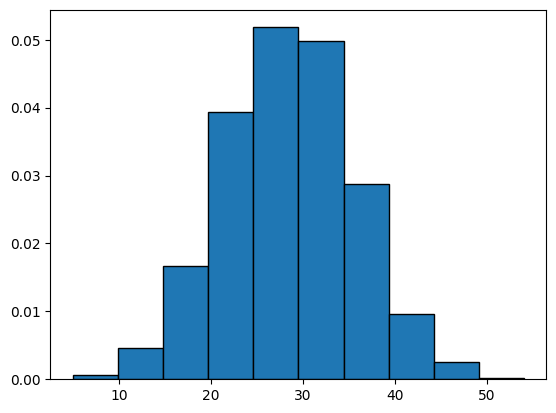

In [13]:
T = 5000 # dias
plt.hist(np.array(sim(T,tiendas).sum()), density=True,edgecolor='black')
# plt.savefig('inv1.png')
plt.show()

Con la media y la desviación estándar calculados recientemente se procede a realizar un histograma de densidad de una distribución normal usando estos datos y se va a comparar con el histograma de las ventas simuladas.

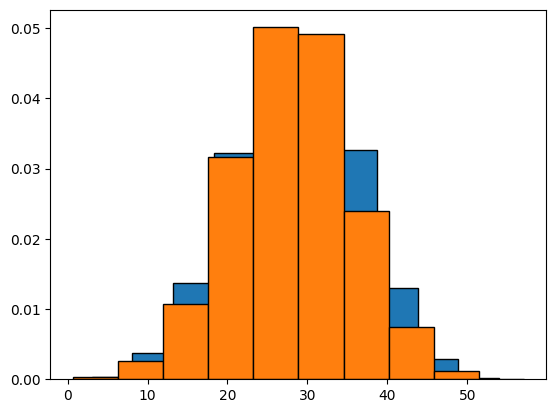

In [14]:
from random import normalvariate as N
from math import ceil

plt.hist( np.array(sim(T,tiendas).sum()) , density = True , edgecolor ='black')
plt.hist( np.array([N(28.28,7.23) for i in range(T)]) , density = True , edgecolor='black')
# plt.savefig('inv2.png')
plt.show()

Ahora se realizarán unas pruebas de hipótesis para comprobar que las ventas de sillas por todas las tiendas siguen una distribución normal.

**Prueba de Geary**

Hipotesis:

*   $H_0:$ la muestra sigue una distribución normal
*   $H_1:$ la no muestra sigue una distribución normal



Sea $X_1, X_2, ...,X_n$ una muestra aleatoria considere el siguiente cociente.

$$U=\dfrac{\sqrt{\dfrac{\pi}{2}}\sum_{i=1}^{n}\dfrac{|X_i-\bar{X}|}{n}}{\sqrt{\sum_{i=1}^{n}\dfrac{(X_i-\bar{X})^2}{n}}}$$

El estadistico de prueba es:

$$Z=\dfrac{U-1}{0.2661/\sqrt{n}}$$

Se acepta la hipotesis nula si

$$-z_{\alpha/2}<Z<z_{\alpha/2}$$

En caso contrario de rechaza.

Donde:

$\alpha:$ nivel de significancia

$\bar{X}=\dfrac{1}{n}\sum_{n}^{i=1}X_i$

In [15]:
from scipy.special import erfinv

a = 0.01 # nivel de significancia

lista = np.array(sim(5000,tiendas).sum())
print(lista)
def Z(muestra):
  n = len(muestra)
  X = muestra.mean()
  num = np.array([abs(i-X) for i in muestra]).sum()/n
  den = np.sqrt(np.array([(i-X)**2 for i in muestra]).sum()/n)
  return ( (np.sqrt(np.pi/2))*(num/den) - 1 ) / ( 0.2661/np.sqrt(n) )

Z1 = Z(np.array(sim(T,tiendas).sum()))

print("Estadistico:",Z1)

print((np.sqrt(2)*erfinv(a-1),-np.sqrt(2)*erfinv(a-1)))

if np.sqrt(2)*erfinv(a-1) < Z1 < -np.sqrt(2)*erfinv(a-1):
  print("Se acepta hipotesis nula")
  print("La muestra sigue una distribución normal con media: {0} y desviacion estandar: {1}".format(round(lista.mean(),2) , round(lista.std(),2)))
else:
  print("Se rechaza la hipotesis nula")


[42 21 26 ... 19 28 29]
Estadistico: 3.122803692424208
(-2.5758293035489004, 2.5758293035489004)
Se rechaza la hipotesis nula


Se utilizo la prueba de Geary porque sirve para muestras grandes de hecho no se usaron las pruebas de hipotesis porque solo sirven para muestras pequeñas.

*   Prueba de Kolmogorov Smirnov
*   Prueba de Shapiro Wilk
*   Prueba de Bondad de ajuste



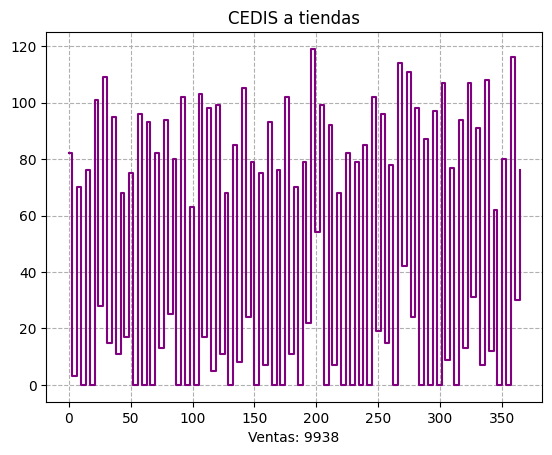

In [58]:
from random import normalvariate as N
from math import floor
import numpy as np
import matplotlib.pyplot as plt

def inv(dias):
	q0 = 198
	q = 0
	v = []
	s = []
	for k in range(dias):
		if k%7==0: # si es lunes se resurte el cedis
			u1 = floor(sum([N(28,7.4) for i in range(4)]))
			s.append(u1)
			q = q0 - u1
			v.append(q)
		elif (k-3)%7==0: # jueves se resurten las tiendas
			u2 = floor(N(28,7.4)+N(28,7.4)+N(28,7.4))
			if q-u2>0:
				s.append(u2)
				q = q - u2
				v.append(q)
			else:
				s.append(q)
				q = 0
				v.append(q)
		else:
			v.append(q)
	return [v,s]

T1 = 365 # dias
w = inv(T1)
plt.title('CEDIS a tiendas')
plt.step([i for i in range(T1)],w[0],where='post',color='purple')
plt.xlabel('Ventas: {}'.format(np.array(w[1]).sum()))
plt.grid(linestyle = 'dashed')
# plt.savefig('inv3.png')
plt.show()